In [1]:
from LanguageModels.Word2Vec import Word2Vec
from LanguageModels.BagOfWords import BagOfWords
from LanguageModels.CustomWord2Vec import CustomWord2Vec
from Preprocessing.LemmatizerPreprocessor import LemmatizerPreprocessor
from Preprocessing.DataLoader import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
import umap


%matplotlib notebook

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Load data
data = DataLoader('../data/EMNLP2020.csv').load()

In [3]:
# Load preprocessor
lp = LemmatizerPreprocessor()

In [4]:
#### Load language model

## Word2Vec Pretrained
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# w2v = Word2Vec(path='../data/glove.6B/glove.6B.200d.txt') 

## Word2Vec Pretrained + Finetuned
# w2v = CustomWord2Vec('../data/glove.6B/glove.6B.200d.finetuned.p')


## Custom word2vec
# w2v = CustomWord2Vec('../data/customw2v.p')

## Bag Of Words
w2v = BagOfWords()

In [5]:
# apply preprocessing and vectorization to create text features

#### multilabel case
X_multilabel, y_multilabel = w2v.featurize(data, lp, mode='multilabel')
# X, y = bow.featurize(data, lp, mode='multilabel')

print(X_multilabel.shape, y_multilabel.shape)

#### multiclass case
X_multiclass, y_multiclass = w2v.featurize(data, lp, mode='multiclass', remove_neg_samples=True)
# X, y = bow.featurize(data, lp, mode='multiclass')

print(X_multiclass.shape, y_multiclass.shape, max(y_multiclass))

#### binary case (note 0=in conference, 1=not in conference)
X_binary, y_binary = w2v.featurize(data, lp, mode='binary')
# X, y = bow.featurize(data, lp, mode='binary')

print(X_binary.shape, y_binary.shape, max(y_binary))

(1450, 10861) (1450, 2)
(750, 6202) (750, 1) [10]
(1450, 10861) (1450, 1) [1]


## Plot 2d and 3d projections  

### Binary

In [6]:
X, y = (X_binary, y_binary)

In [7]:
# X_embedded2d = TSNE(n_components=2).fit_transform(X)
# X_embedded3d = TSNE(n_components=3).fit_transform(X)

X_embedded2d = umap.UMAP(n_components=2).fit_transform(X)
X_embedded3d = umap.UMAP(n_components=3).fit_transform(X)

<IPython.core.display.Javascript object>


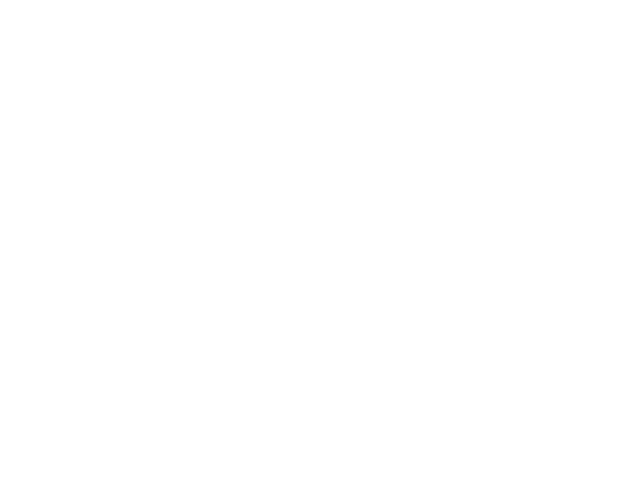

In [8]:
plt.scatter(X_embedded2d[:,0], X_embedded2d[:,1], c=y)

<IPython.core.display.Javascript object>


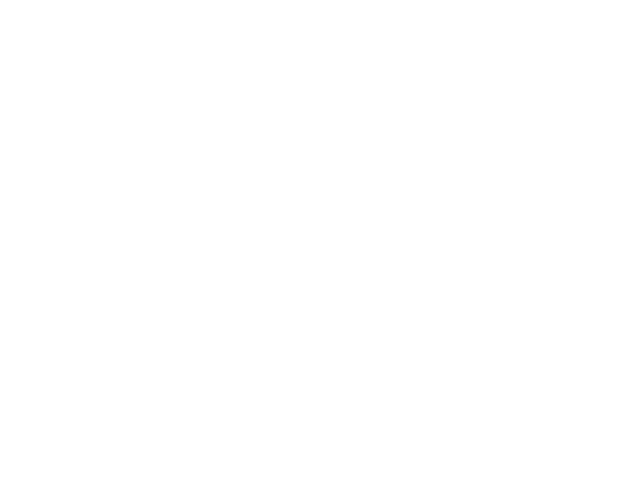

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_embedded3d[:,0], X_embedded3d[:,1], X_embedded3d[:,2], c=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,), test_size=0.33, random_state=42, stratify=y)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
print("Training Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

Training Accuracy:  0.9824922760041195
Testing Accuracy:  0.778705636743215
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       248
           1       0.77      0.78      0.77       231

    accuracy                           0.78       479
   macro avg       0.78      0.78      0.78       479
weighted avg       0.78      0.78      0.78       479



### Multiclass

In [11]:
X, y = (X_multiclass, y_multiclass)

In [12]:
# X_embedded2d = TSNE(n_components=2).fit_transform(X)
# X_embedded3d = TSNE(n_components=3).fit_transform(X)

X_embedded2d = umap.UMAP(n_components=2).fit_transform(X)
X_embedded3d = umap.UMAP(n_components=3).fit_transform(X)

<IPython.core.display.Javascript object>


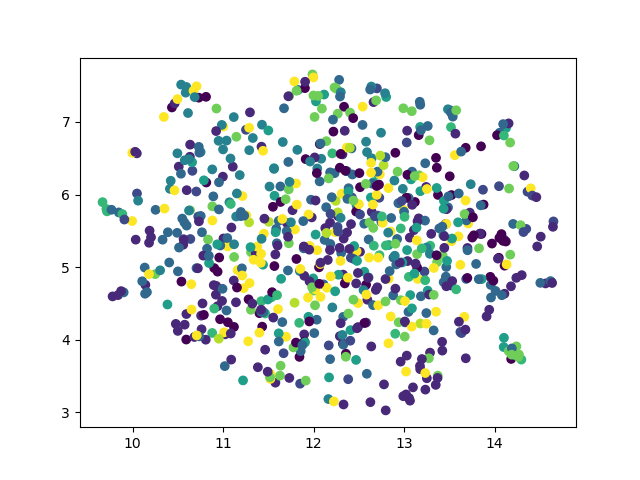

In [16]:
plt.scatter(X_embedded2d[:,0], X_embedded2d[:,1], c=y)

<IPython.core.display.Javascript object>


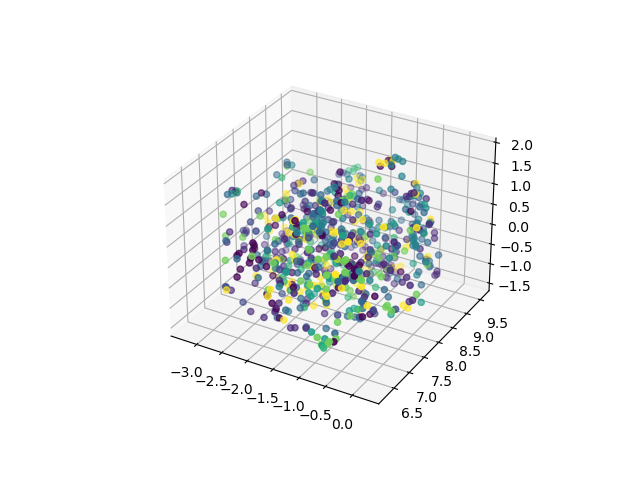

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_embedded3d[:,0], X_embedded3d[:,1], X_embedded3d[:,2], c=y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,), test_size=0.33, random_state=42, stratify=y)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
print("Training Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

Training Accuracy:  0.8446215139442231
Testing Accuracy:  0.2217741935483871
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.22      1.00      0.36        55
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00        32

    accuracy                           0.22       248
   macro avg       0.02      0.10      0.04       248
weighted avg       0.05      0.22      0.08       248



C:\Users\Ryan\anaconda3\envs\python3_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\envs\python3_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\envs\python3_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
